# 1. Load necessary packages and classes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import seaborn as sns
from scipy import signal

# 2. Simulate network for specific parameters

In [3]:
from NetworkSTDall import NetworkSTDall

In [4]:
#Define network parameters to run simulations
Dnumber = 0.84
Fnumber = 1
p0_stf = 0.7
t0 = 0
tf = 10000
h=0.05

#Run simulation
NetworkSTDall(Dnumber, Fnumber, t0, tf, h, p0_stf)

--------------------------  STD - NETWORK  ---------------------------
----------------------------- Data loaded  ---------------------------
P shape:  (320, 320)
ExcInh shape before reshape:  (1, 320)
ExcInh shape after reshape:  (320,)
----------------------------- Simulation parameters  ---------------------------
Depression factor, fD:  0.84
Facilitation factor, fF:  1
Initial time, t0:  0
Final time, tf:  10000
Runge-kutta step, h:  0.05
Number of rk45 iterations, N:  200000
Number of neurons in the network, Nneurons:  320
Number of equations for each neuron, neq:  20
Number of total variables in the network, nvar = Nneuronsxneq:  6400


# 3. Loading and visualizing network results

### Before visualizing network simulation results, please restart the kernel. Run only the cells in sections:
        1. Load the necessary packages and classes
        3. Loading and visualizing network results (all the following cells)

In [3]:
from TreatNetworkData import TreatNetworkData
from Tools import plot_IFRnetwork

### Create a folder in your current workspace named fDDnumber_fFFnumber where Dnumber is the depression factor and Fnumber is the facilitation factor you chose to run the simulation. All the images and files are going to be saved there.

In [5]:
Dnumber = 0.84
Fnumber = 1
h = 0.05

file_name = "fD"+str(Dnumber)+"_fF"+str(Fnumber)+".npz"
NetworkData = TreatNetworkData(file_name,Dnumber,Fnumber,h)

### Get tolerance used in the simulation

In [6]:
tol = NetworkData.get_tol()

### Get colors used to plot data of excitatory and inhibitory populations

In [7]:
ExcColor,InhColor = NetworkData.get_ExcInhColors()

### Get number of neurons used in the simulation

In [8]:
nNeurons = NetworkData.get_nNeurons()

## Plot specific variable of specific neuron 

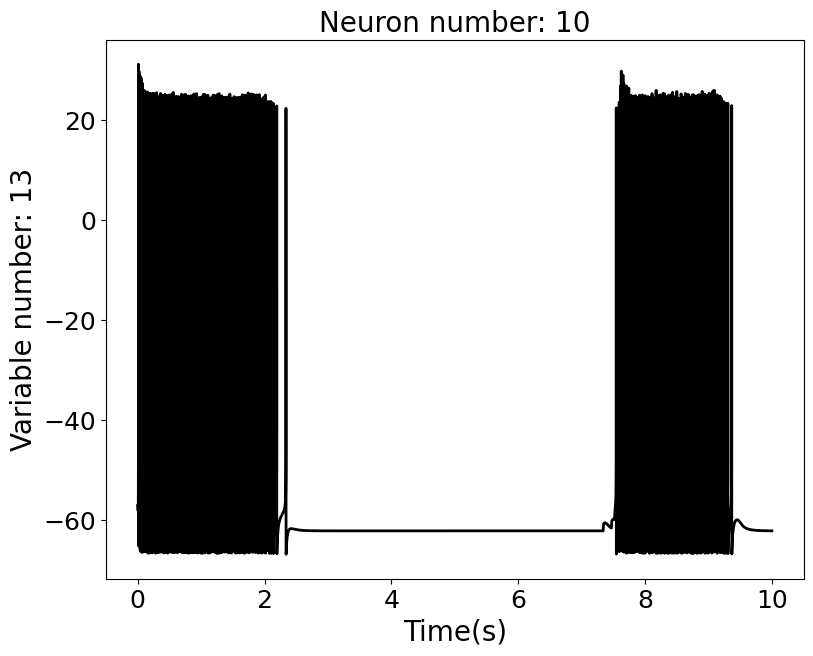

In [9]:
variable_number = 13
neuron_number = 10
time = NetworkData.get_time()
variable = NetworkData.get_variable_neuron(neuron_number,variable_number)
fig=plt.figure(figsize=(9,7))
plt.plot(time/1000,variable,linewidth=2,color='k')
plt.title("Neuron number: "+str(neuron_number),fontsize=20)
plt.xlabel("Time(s)",fontsize=20)
plt.ylabel("Variable number: "+str(variable_number),fontsize=20)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
#plt.savefig("Variable_neuron.png")

# Plot probability of release

In [10]:
avg_pRelAMPA,avg_pRelNMDA,avg_pRelGABA,avg_pRel_stfAMPA,avg_pRel_stfNMDA,avg_pRel_stfGABA = NetworkData.getAveragePrel()

### Prel depression arrays

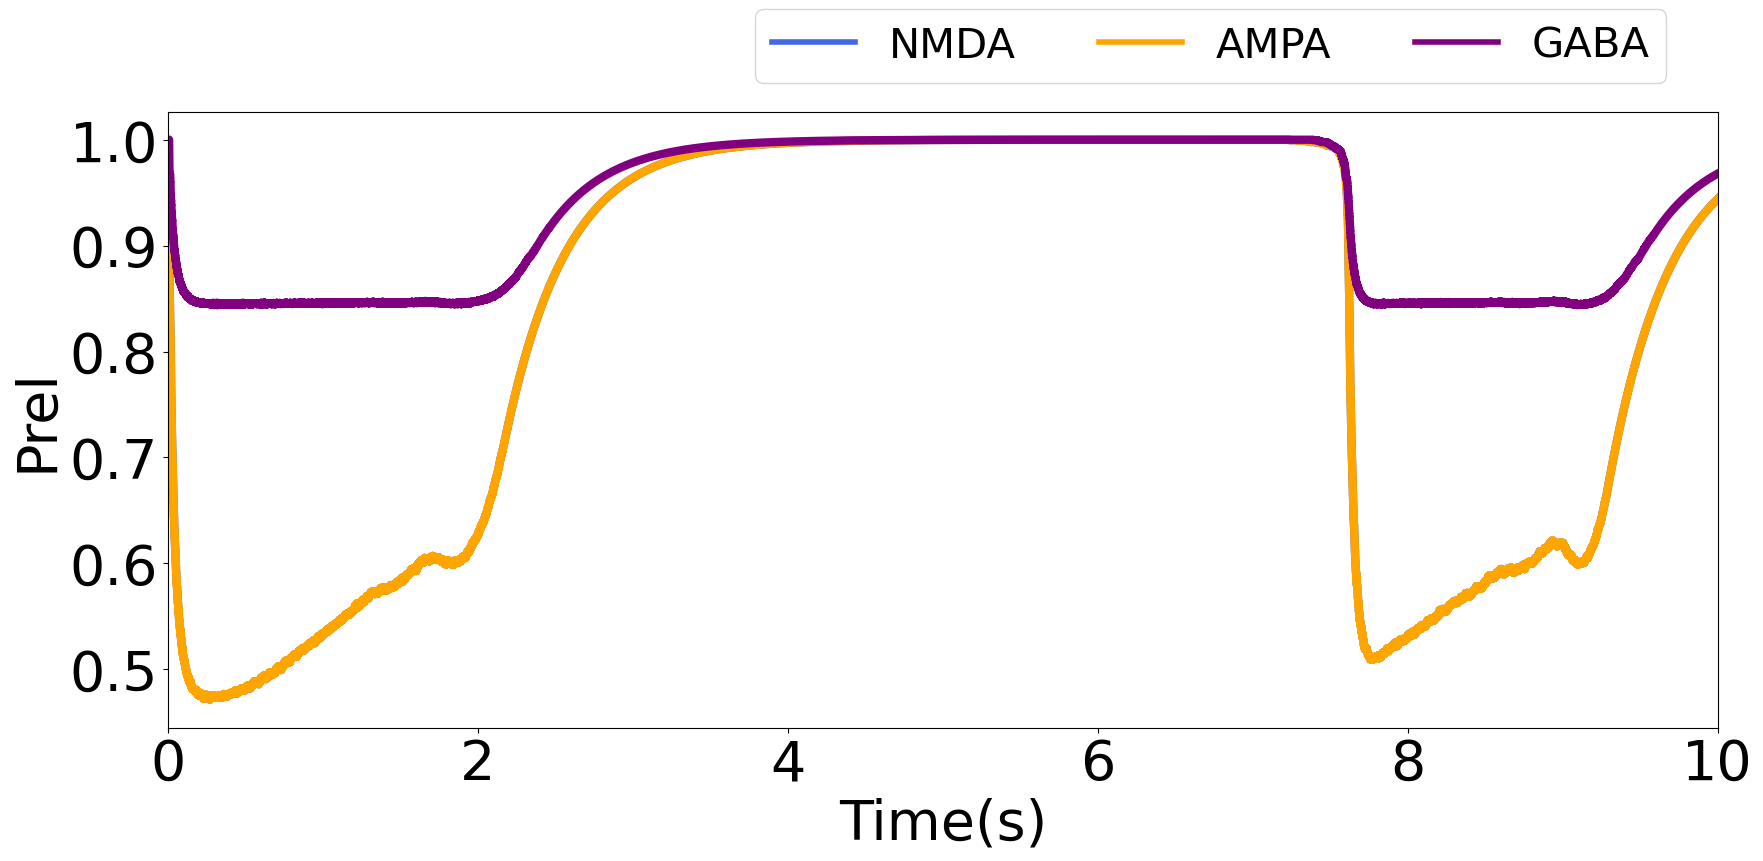

In [12]:
plastic_type = 'D'
fig = NetworkData.plotAveragePrel(avg_pRelAMPA, avg_pRelNMDA, avg_pRelGABA,plastic_type)

### Prel facilitation arrays

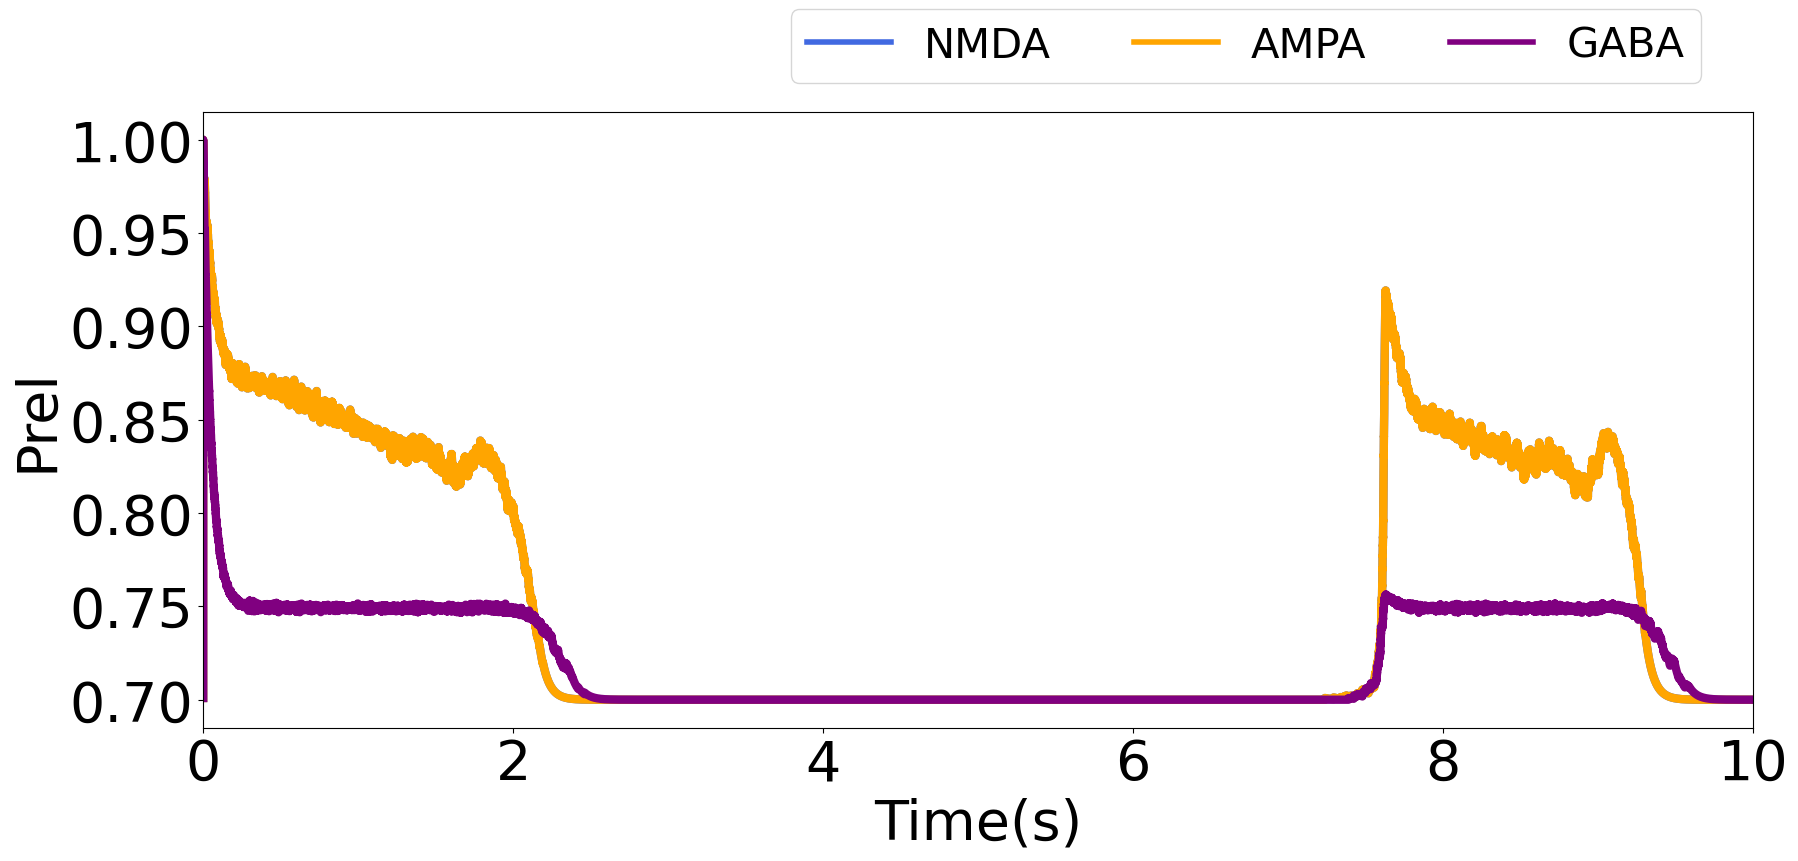

In [13]:
plastic_type = 'F'
fig = NetworkData.plotAveragePrel(avg_pRel_stfAMPA, avg_pRel_stfNMDA, avg_pRel_stfGABA,plastic_type)

## Compute firing_matrix and voltage_peak matrix

Firing_matrix: Contains 1 if neuron at that position fires a spike at time t, otherwise contains 0

VoltagePeak_matrix: Contains the peak of the spike fired at time t

In [14]:
firing_matrix,voltagePeak_matrix = NetworkData.firing_amplitude_matrix()

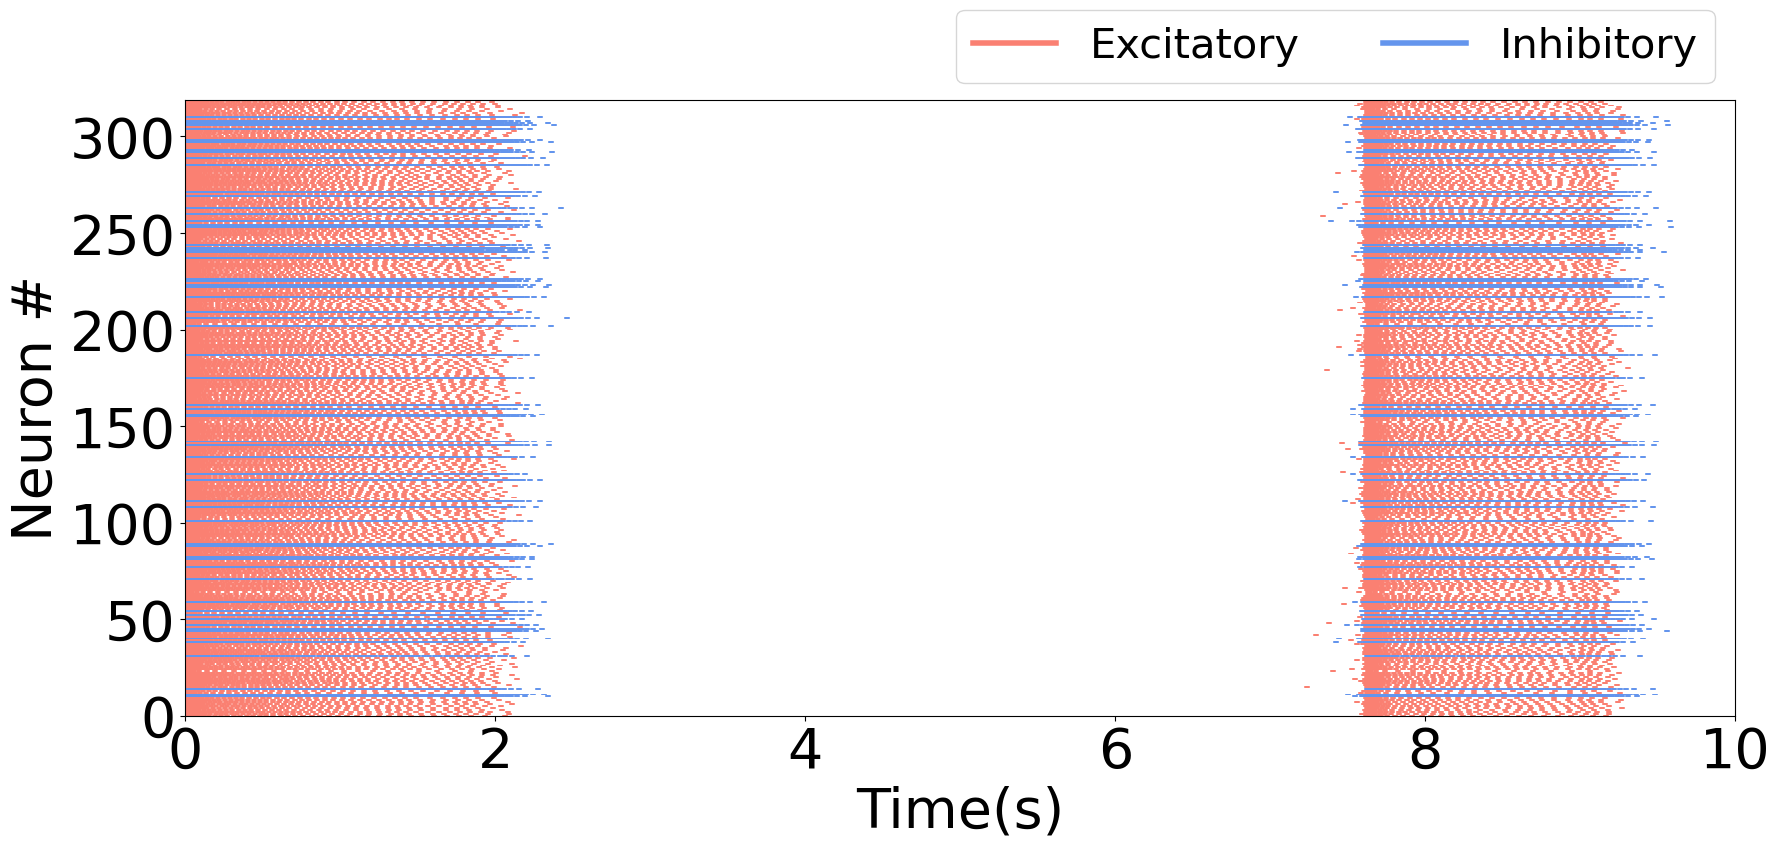

In [15]:
fig = NetworkData.eventplotFiring(firing_matrix)
fig

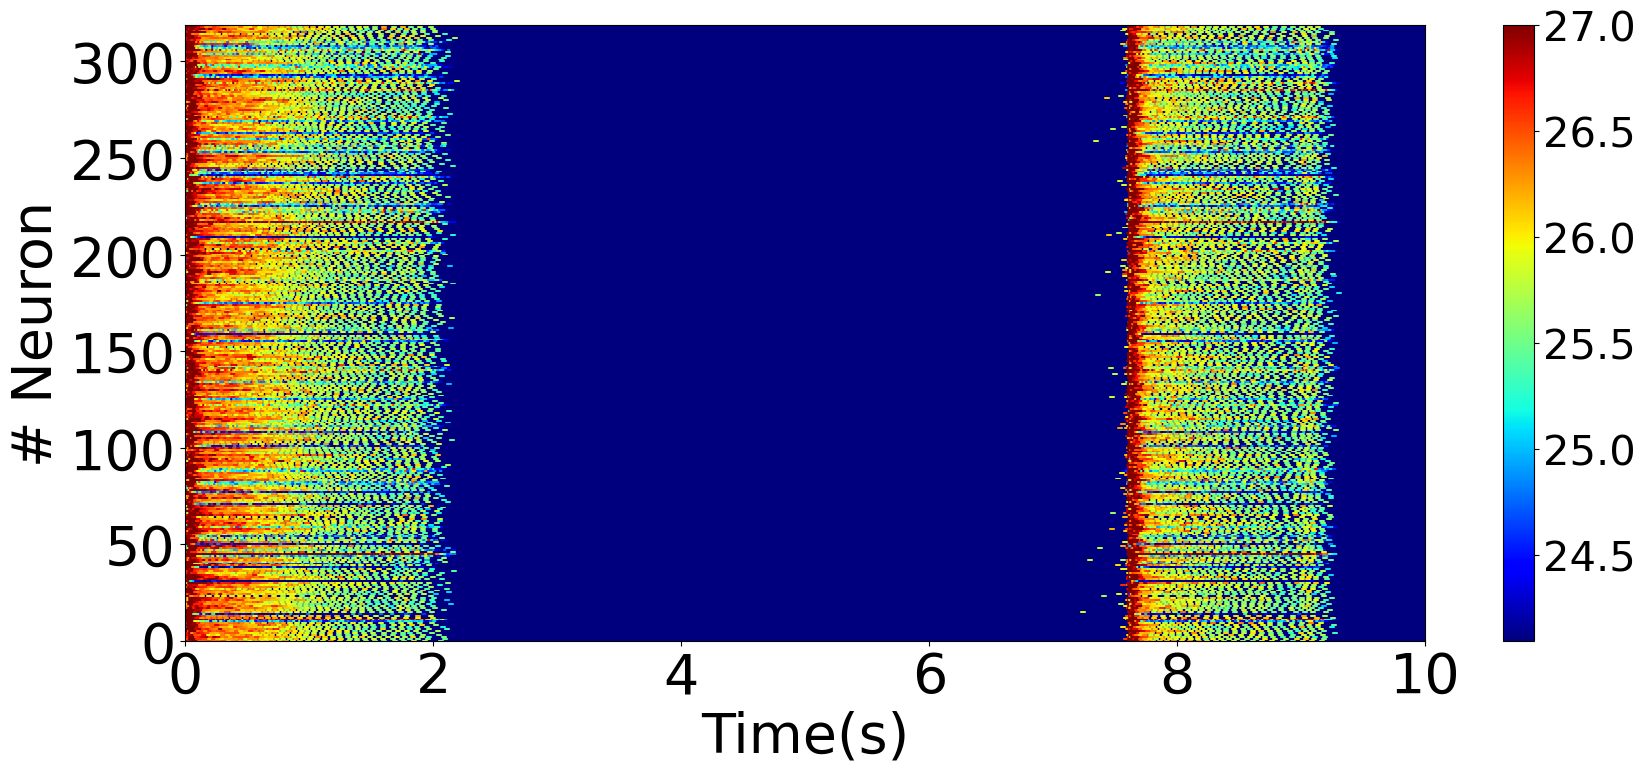

In [16]:
fig = NetworkData.eventplotAmplitude(firing_matrix,voltagePeak_matrix)
fig

# 2. Calculate dataframes with spikes and ISI statistics of the network

In [17]:
df_ISI,df_nSpikes,d_fr = NetworkData.count_spike_bins(firing_matrix,1000) #length del bin en ms

In [18]:
df_ISI

Neuron #        Type  ISI (ms)
0             0  Excitatory     11.80
1             0  Excitatory     11.80
2             0  Excitatory     14.35
3             0  Excitatory     19.00
4             0  Excitatory     24.65
...         ...         ...       ...
32098       319  Excitatory     85.90
32099       319  Excitatory     72.20
32100       319  Excitatory     64.85
32101       319  Excitatory     67.30
32102       319  Excitatory    109.50

[32103 rows x 3 columns]

In [19]:
df_nSpikes

Neuron #        Type   Bin  numSpikes
0            0  Excitatory   0-1         26
1            0  Excitatory   1-2         13
2            0  Excitatory   2-3          1
3            0  Excitatory   3-4          0
4            0  Excitatory   4-5          0
...        ...         ...   ...        ...
3195       319  Excitatory   5-6          0
3196       319  Excitatory   6-7          0
3197       319  Excitatory   7-8         11
3198       319  Excitatory   8-9         15
3199       319  Excitatory  9-10          3

[3200 rows x 4 columns]

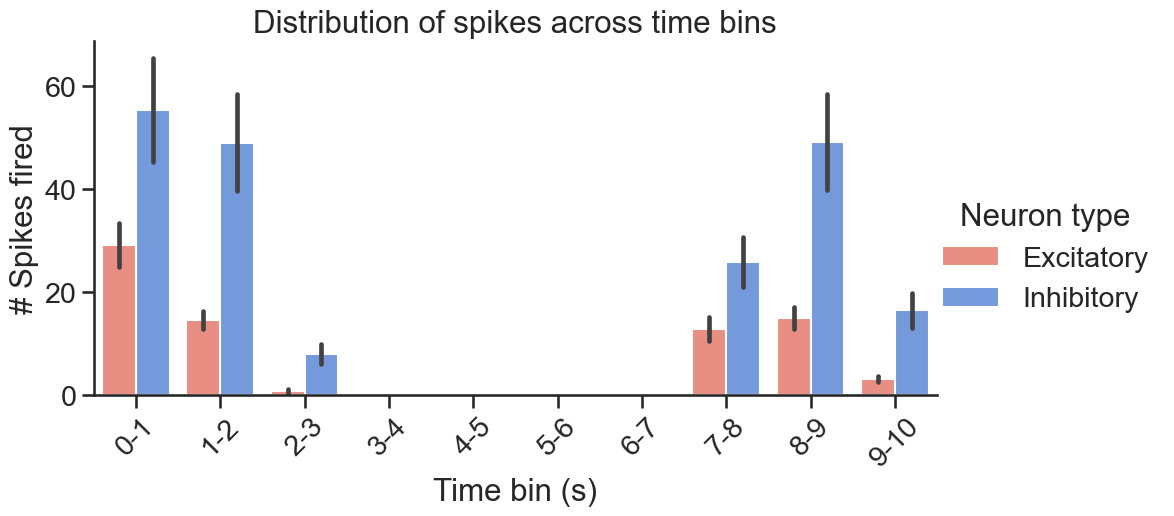

In [20]:
NetworkData.plot_spike_distribution(df_nSpikes)

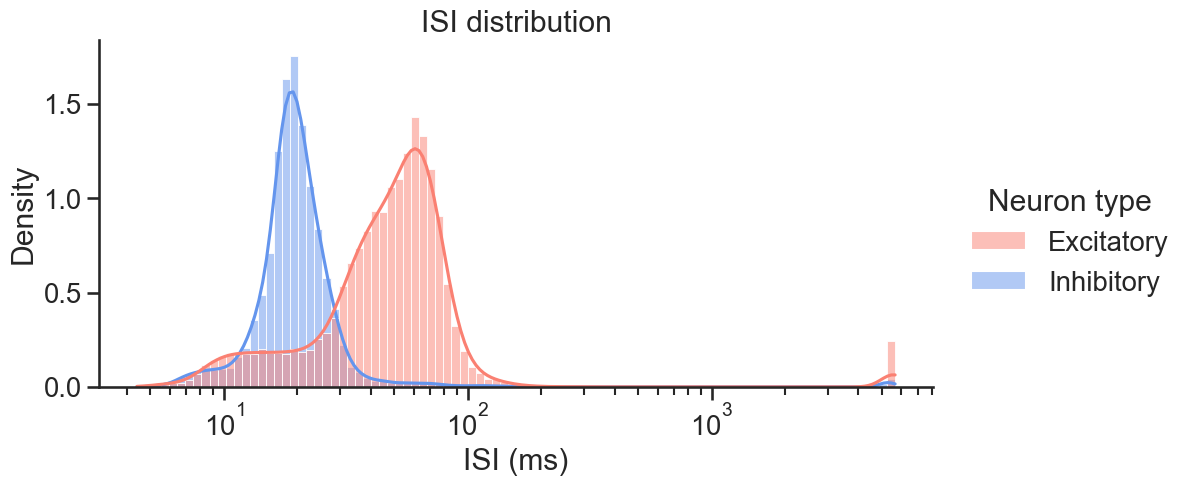

In [21]:
NetworkData.plot_ISIdistribution(df_ISI)

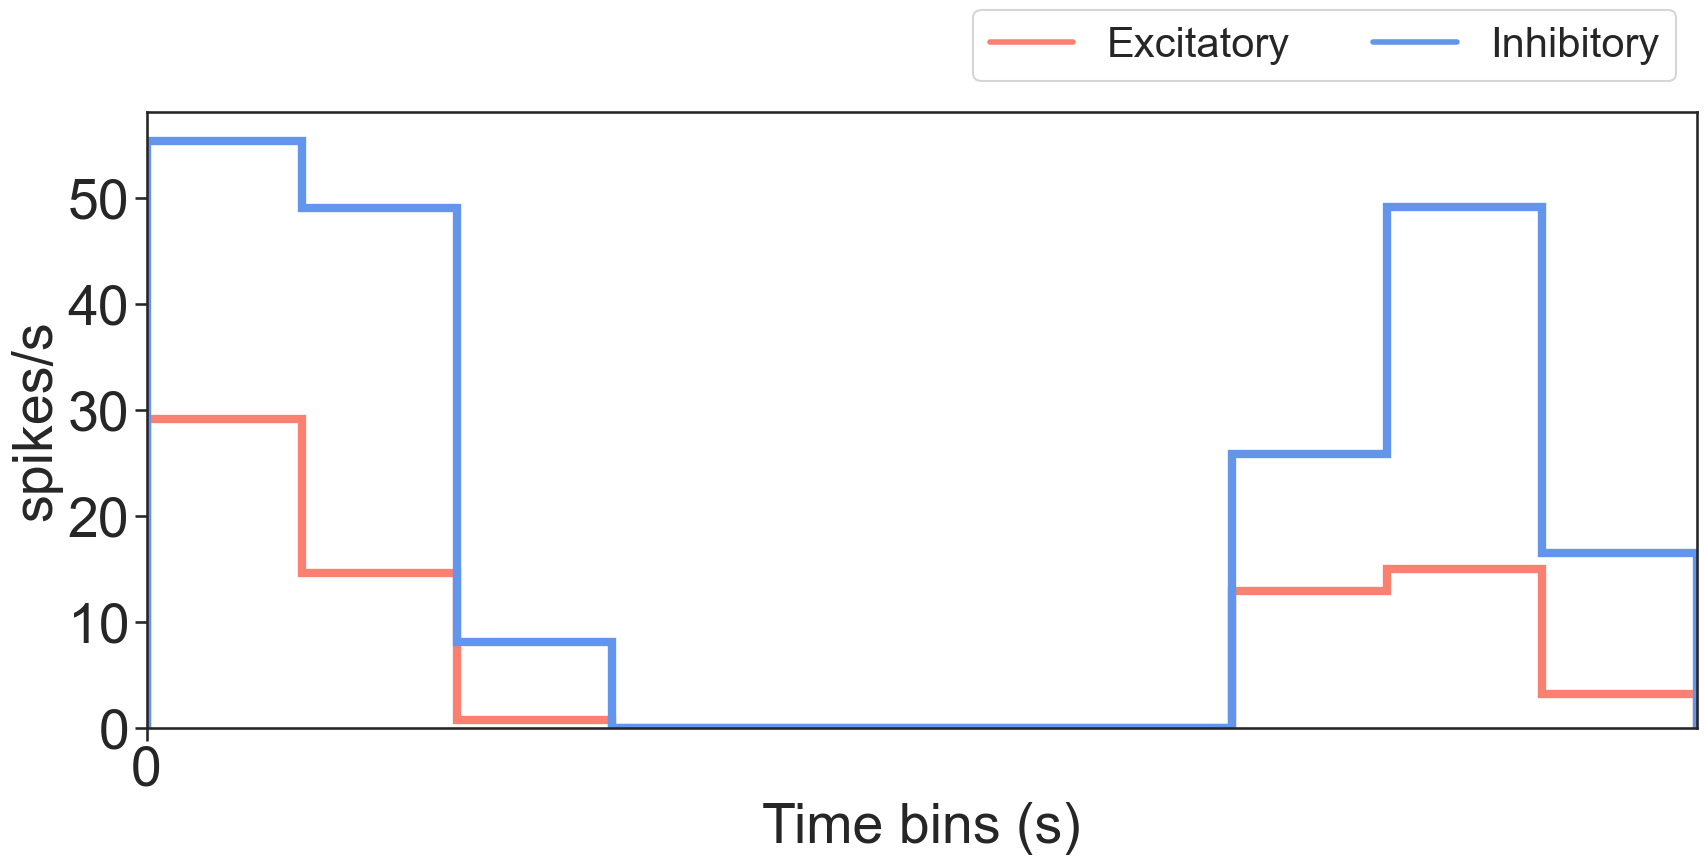

In [22]:
NetworkData.plot_firing_rate(d_fr)

In [25]:
window_type="rectangular"
window_width=100

window = signal.windows.boxcar(int(window_width/0.05))
#spikes_vector=firing_matrix[11]
map_output, Exc, Inh = NetworkData.IFRnetwork(window_type, window_width,firing_matrix)


In [26]:
file = "fD"+str(Dnumber)+"_fF"+str(Fnumber)+'/NetworkIFR.npz'
#file = 'NetworkIFR.npz'
fig1,fig2,Exc_mean,Inh_mean = NetworkData.plot_IFRnetwork(file)

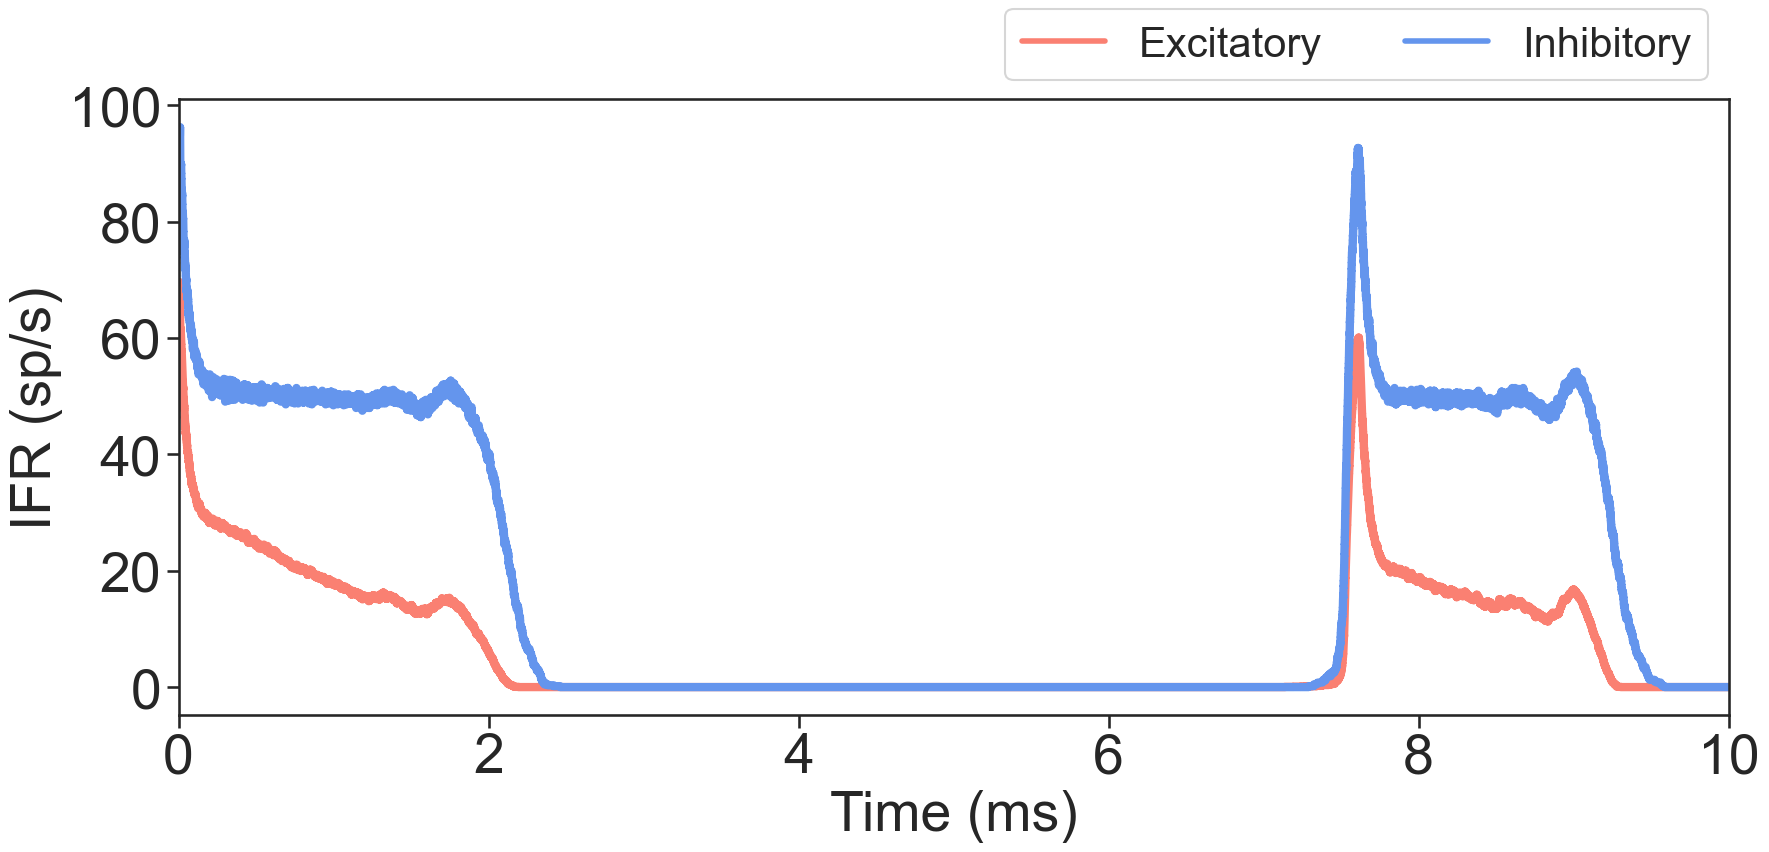

In [27]:
fig1

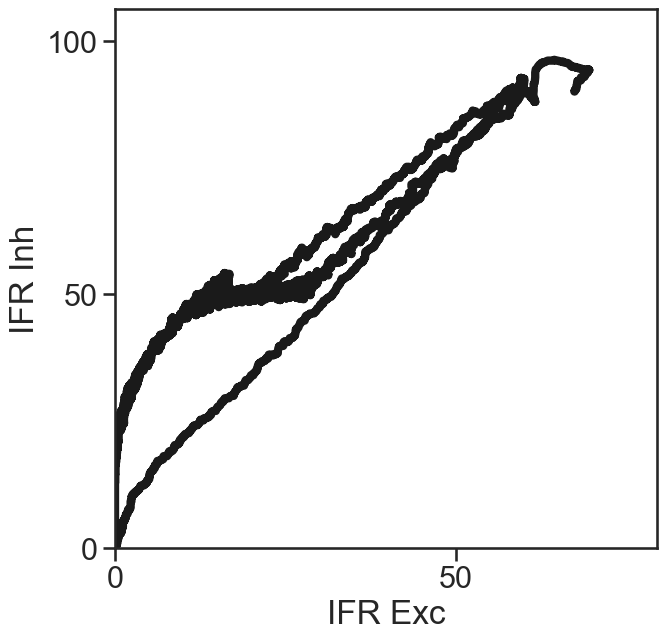

In [28]:
fig2

# Individual neuron spectrums

## Raw periodogram and Danielle periodogram

In [29]:
neuronExcVoltage = NetworkData.get_variable_neuron(1,1)
neuronInhVoltage = NetworkData.get_variable_neuron(10,13)
fig1,fig2 = NetworkData.RawPeriodogramFFT(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


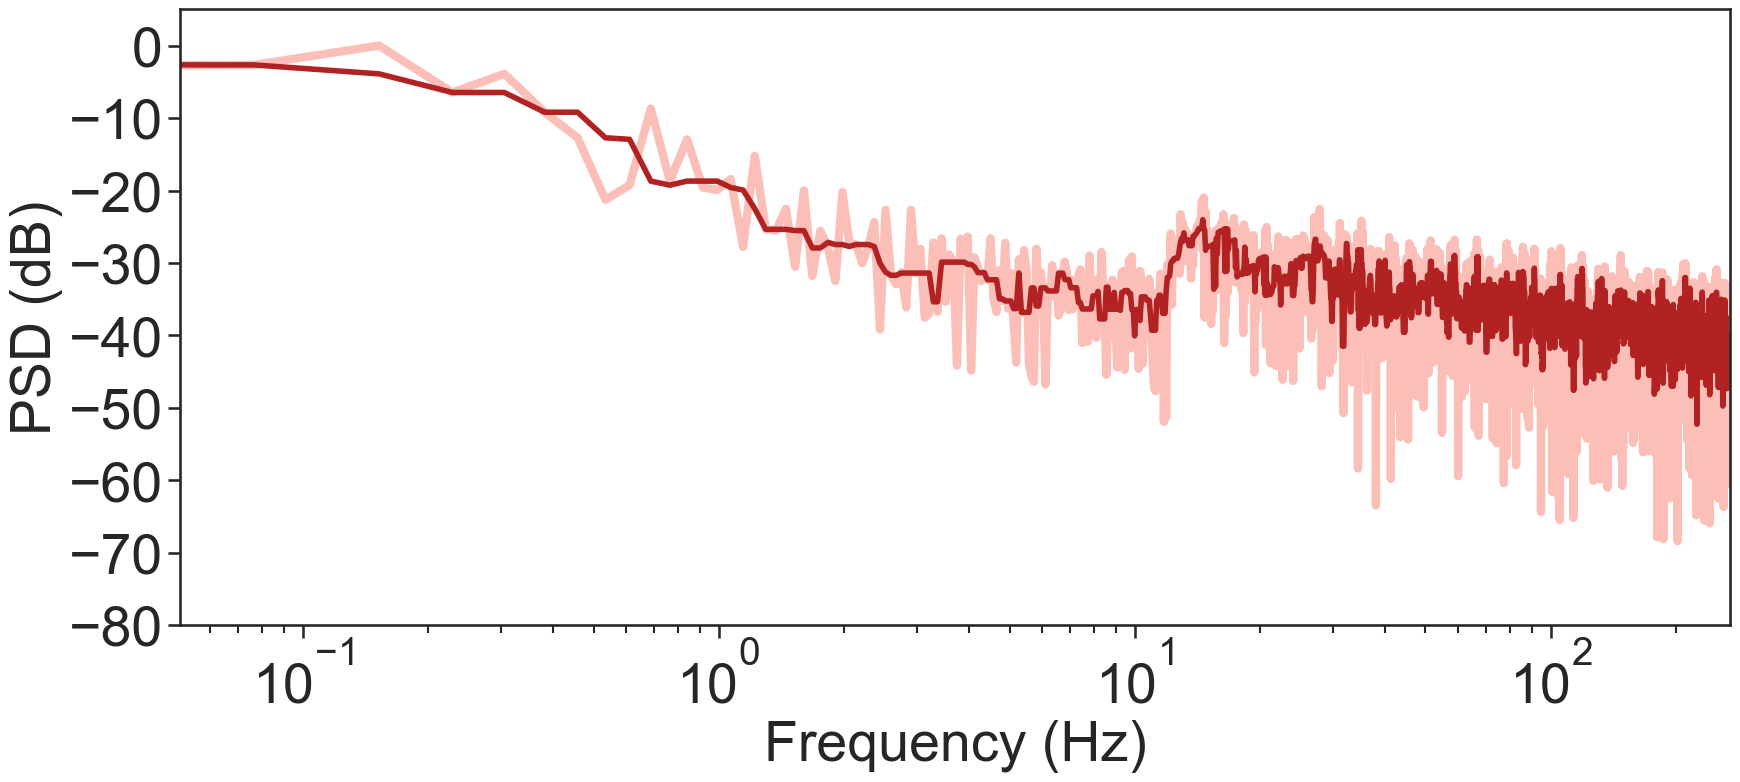

In [30]:
fig1

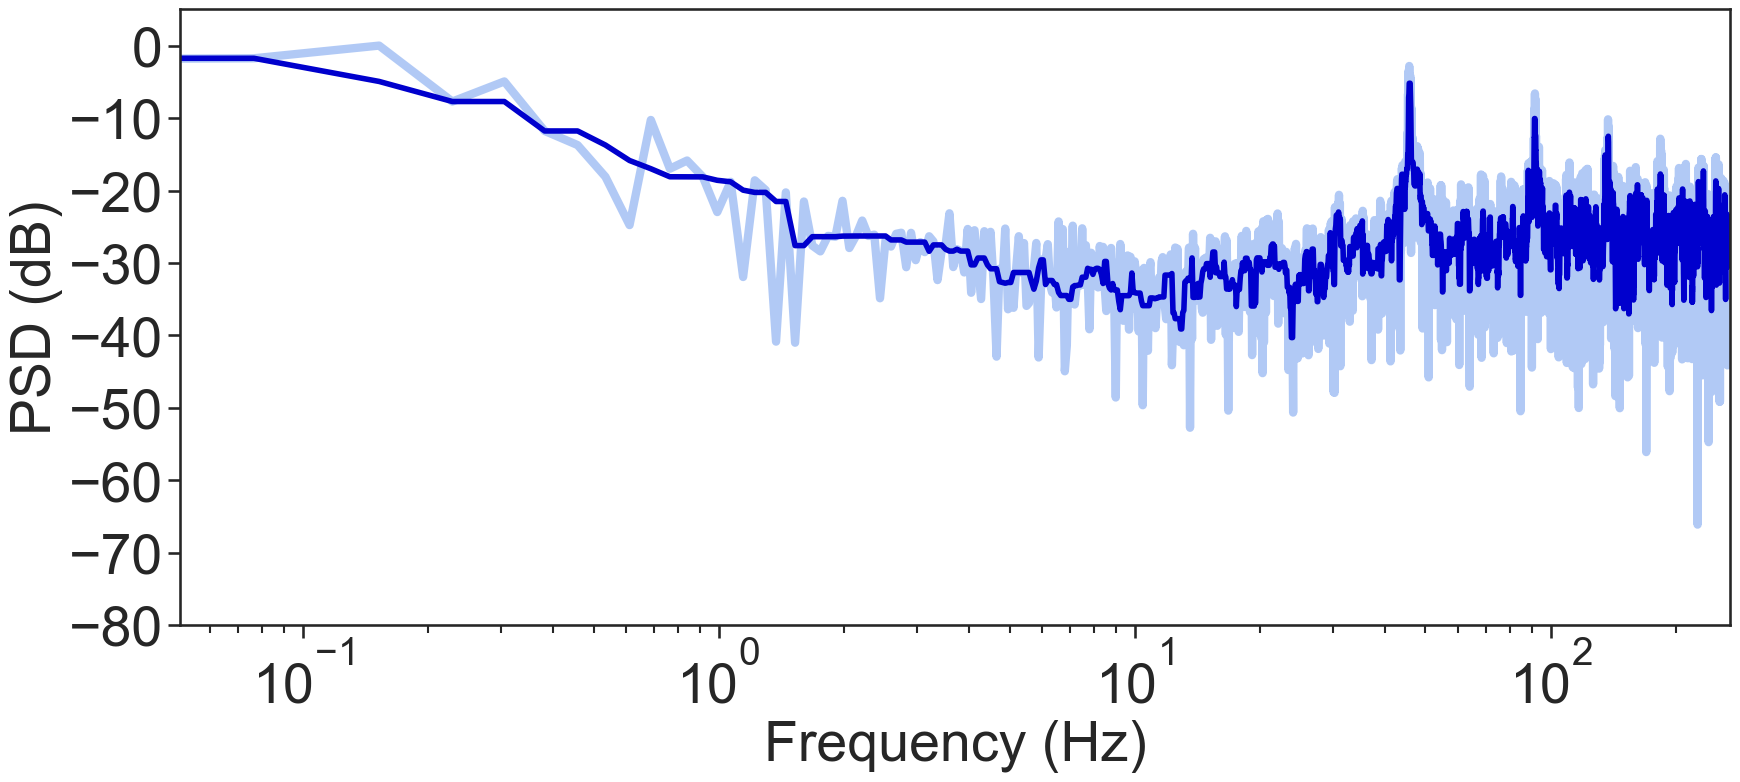

In [31]:
fig2

## Tappered periodogram with Hanning window and Danielle periodogram

In [32]:
fig1,fig2 = NetworkData.TapperedHanningPeriodogramFFT(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


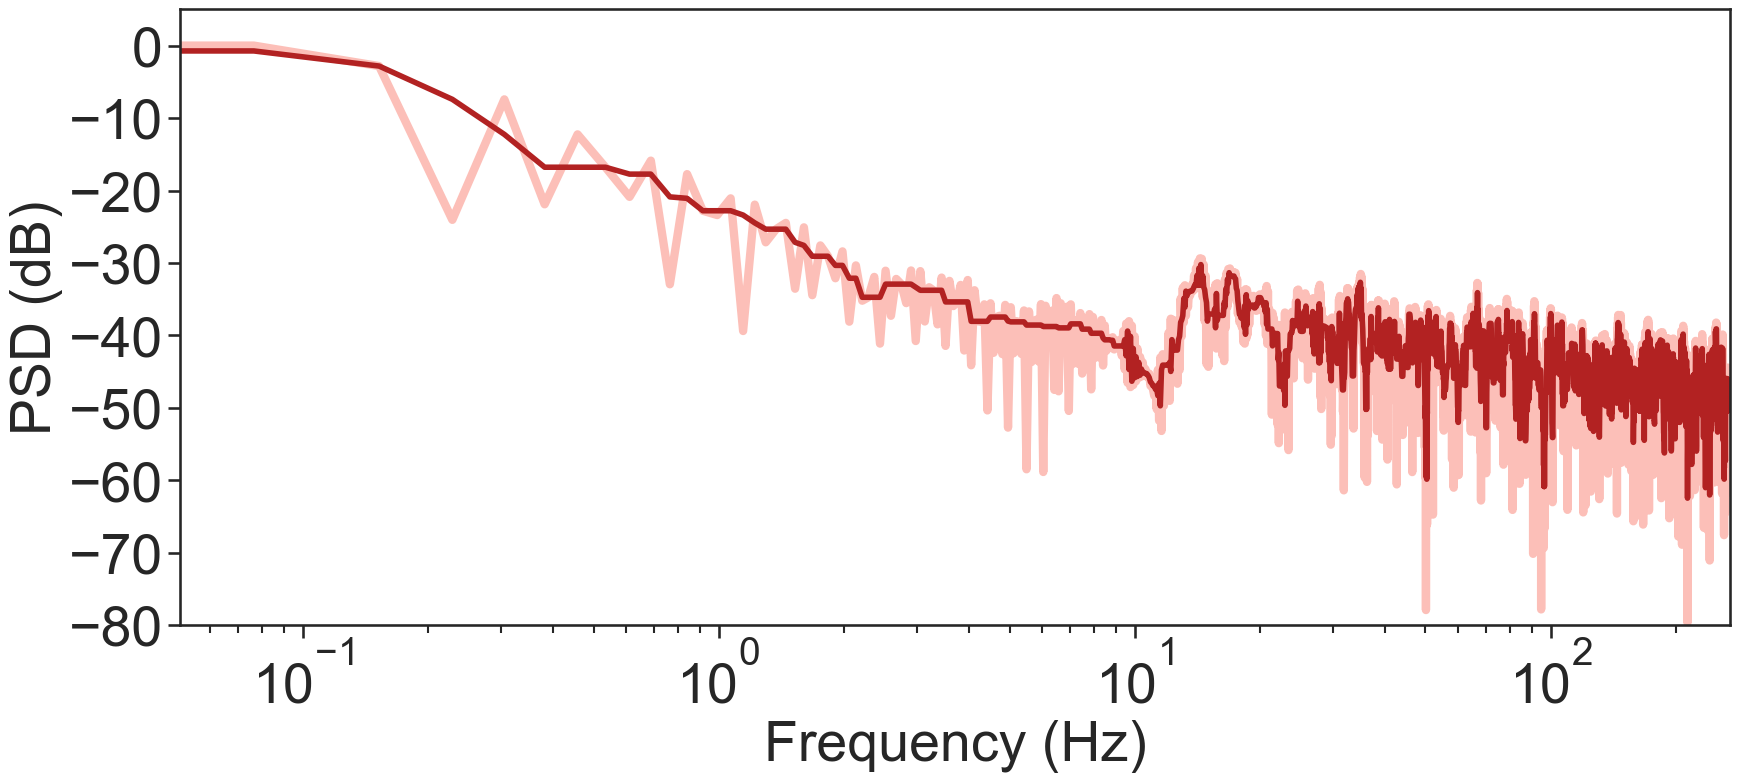

In [33]:
fig1

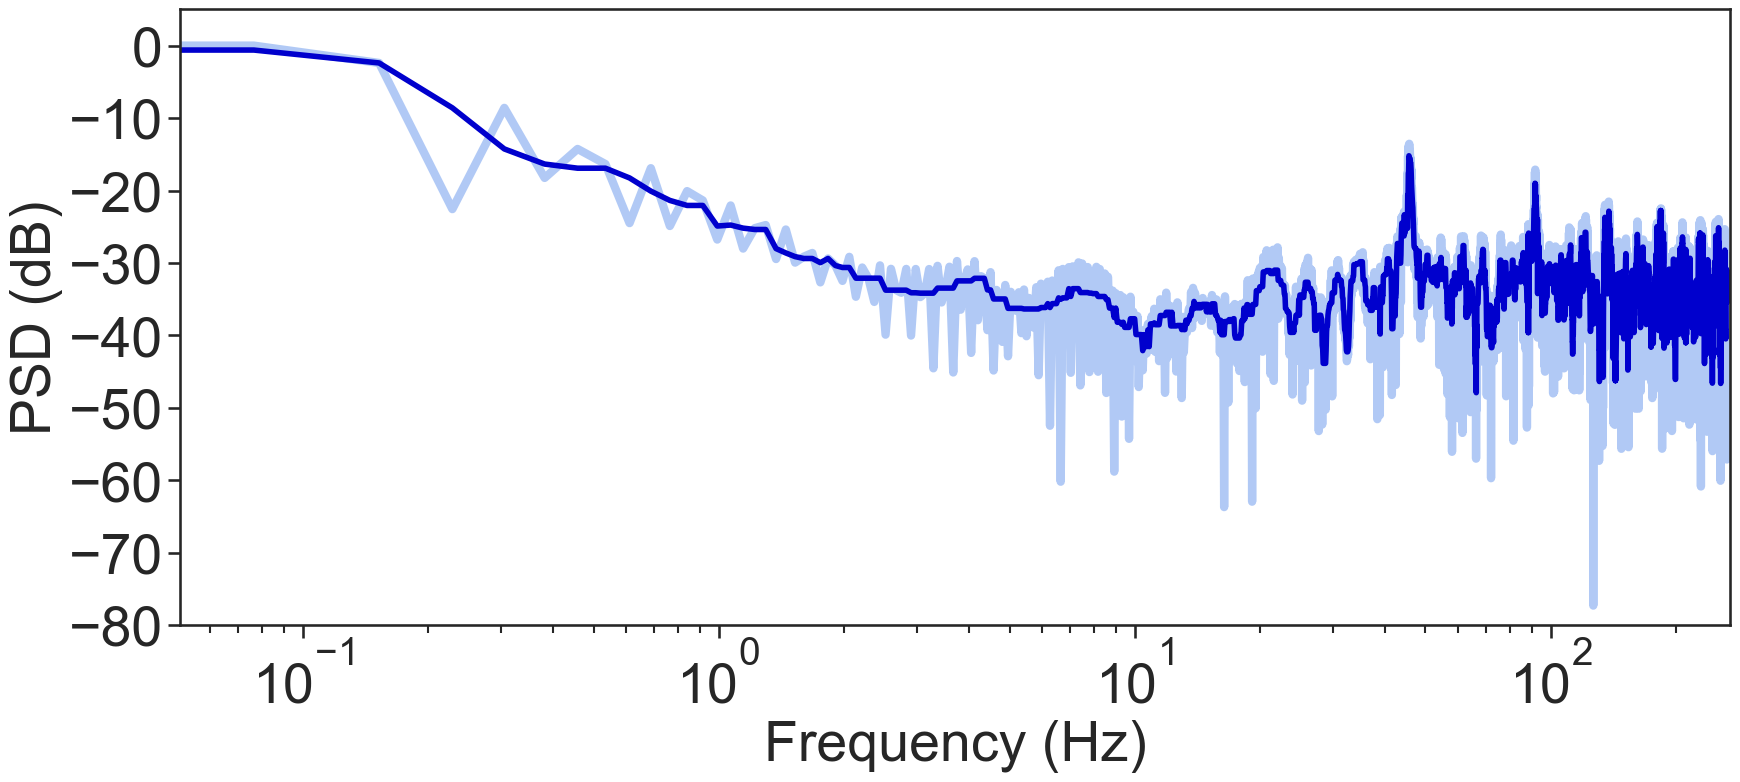

In [34]:
fig2

## Periodogram computed with multitapering method

In [35]:
fig1,fig2 = NetworkData.SpectrumMultitaper(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


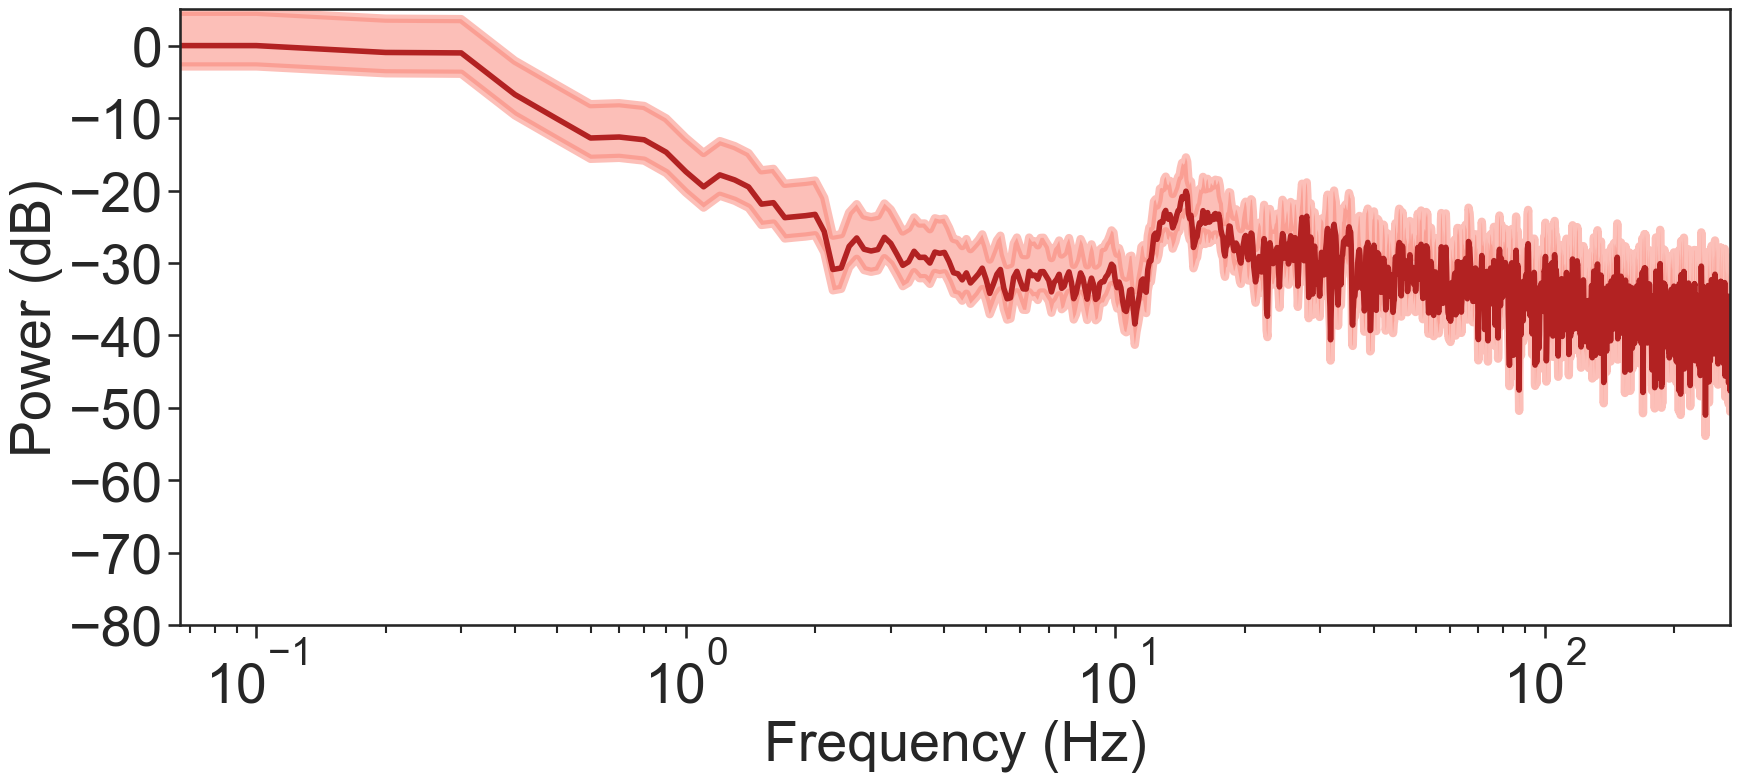

In [36]:
fig1

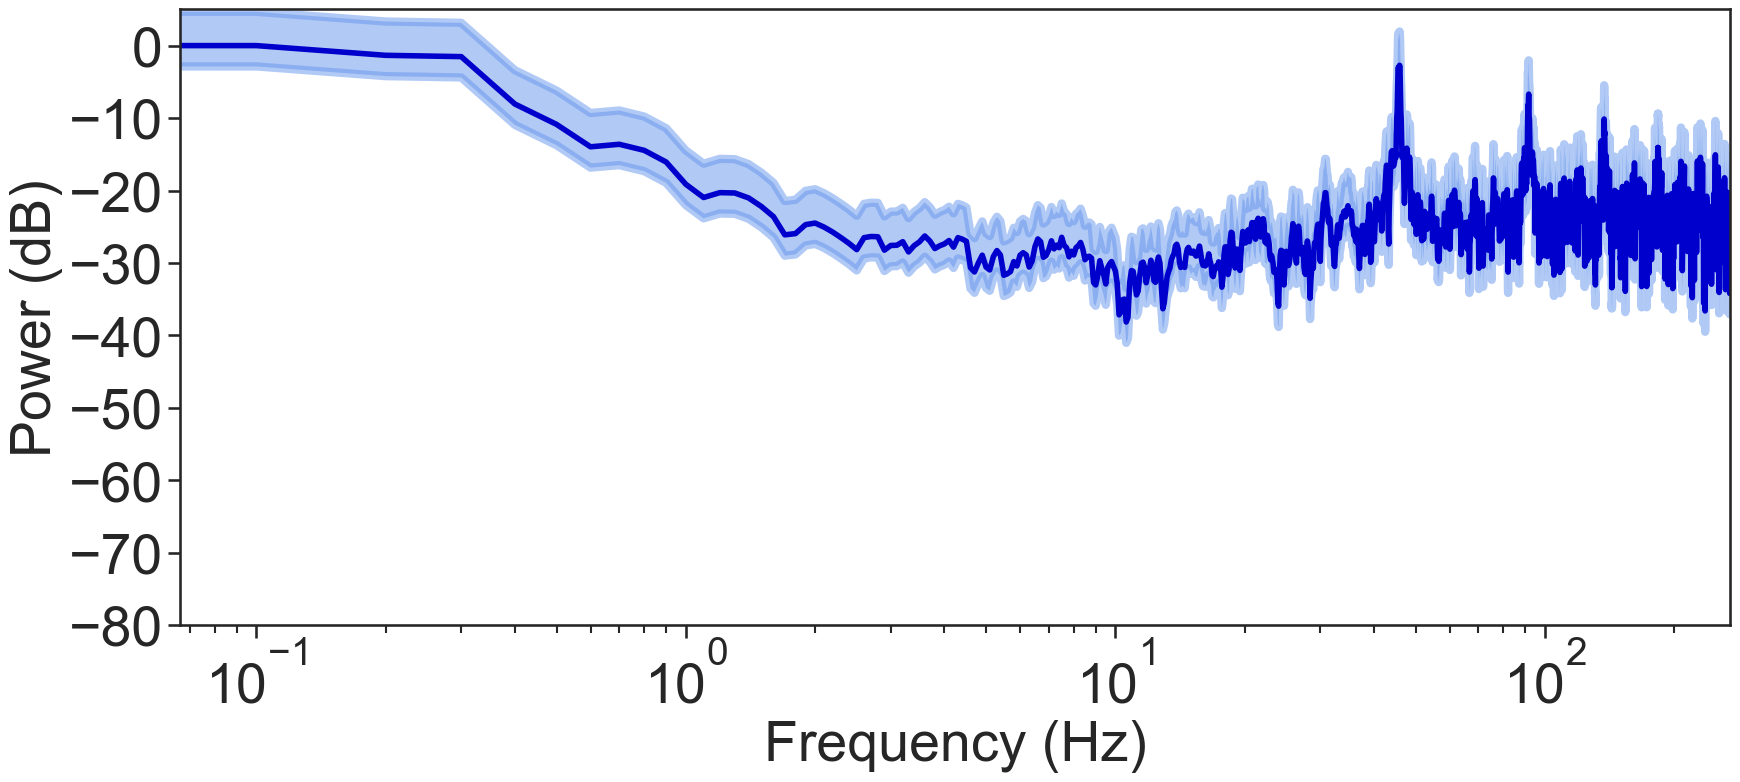

In [37]:
fig2

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]
minvalue_e:  8.961487523071413e-15
maxvalue_e:  9.157451662635756
minvalue_i:  8.63614645580103e-13
maxvalue_i:  18.70767404789922


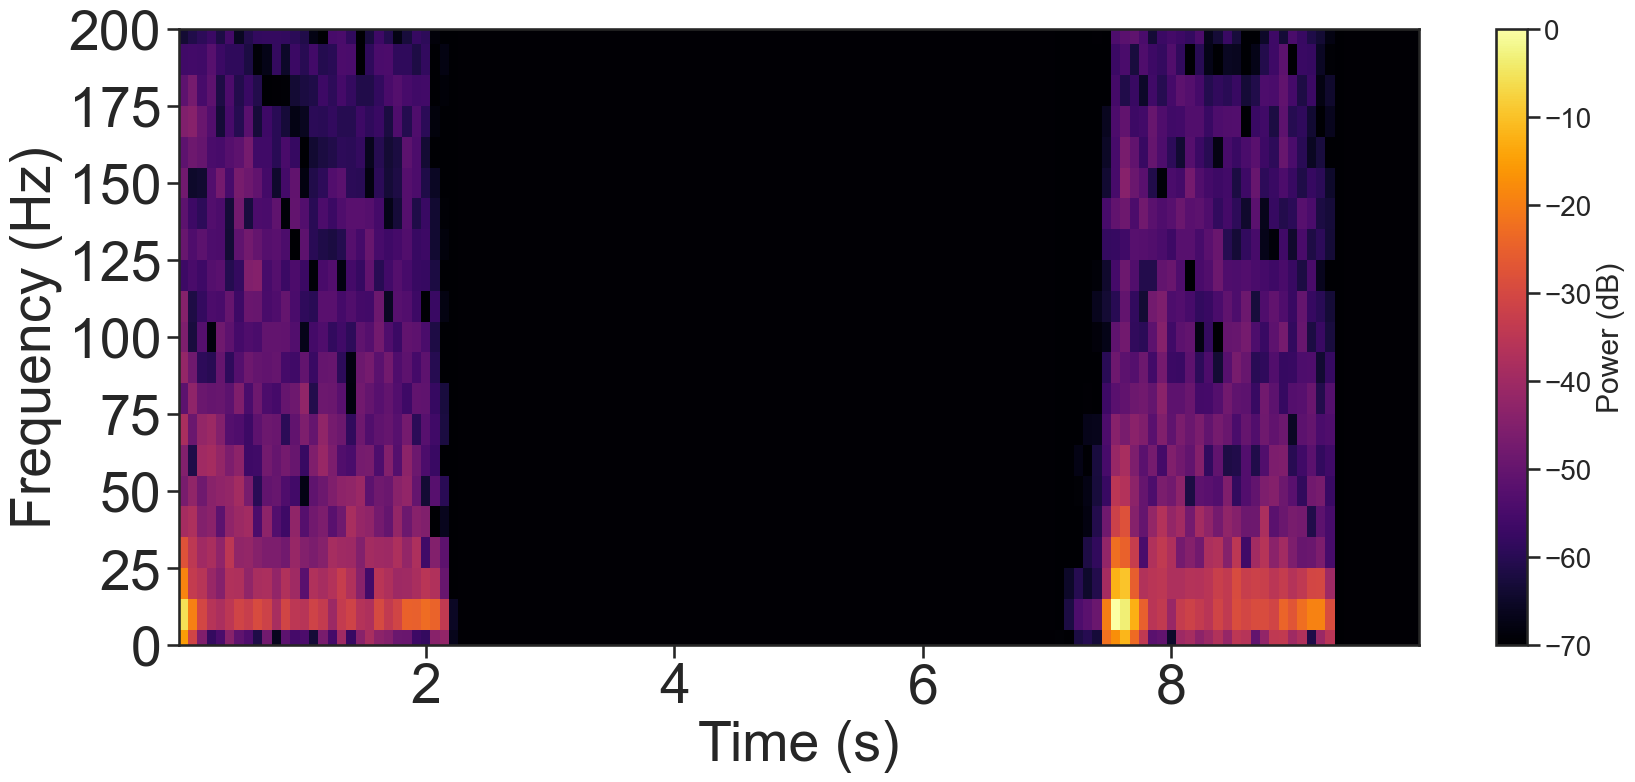

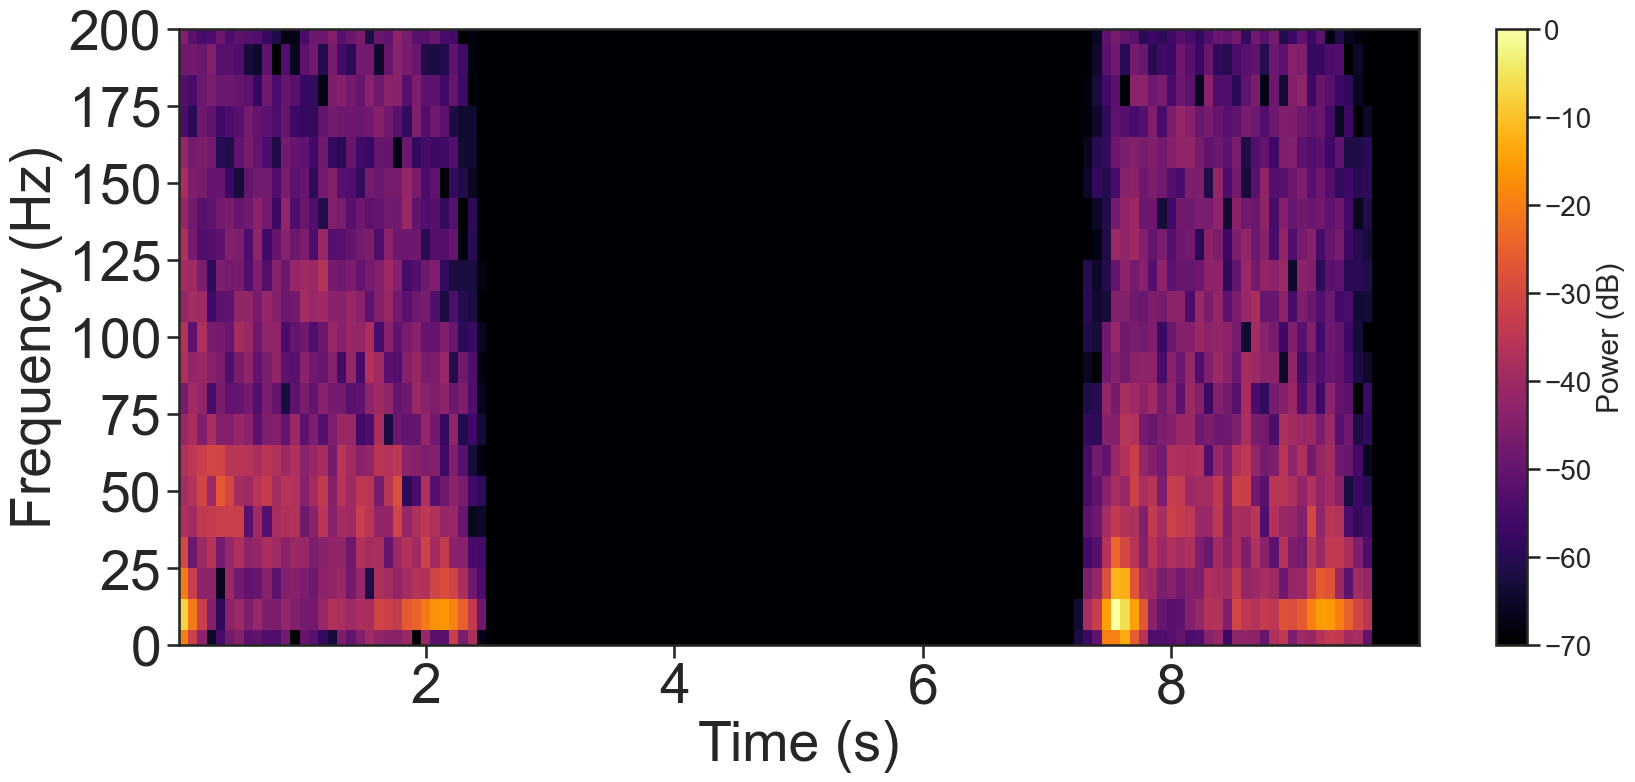

In [38]:
fig1,fig2 = NetworkData.NeuronSpectrogram(Exc_mean,Inh_mean)

## Spectrum Instantaneous Firing Rate excitatory and inhibitory populations

In [39]:
fig1,fig2 = NetworkData.SpectrumMultitaper(Exc_mean,Inh_mean)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


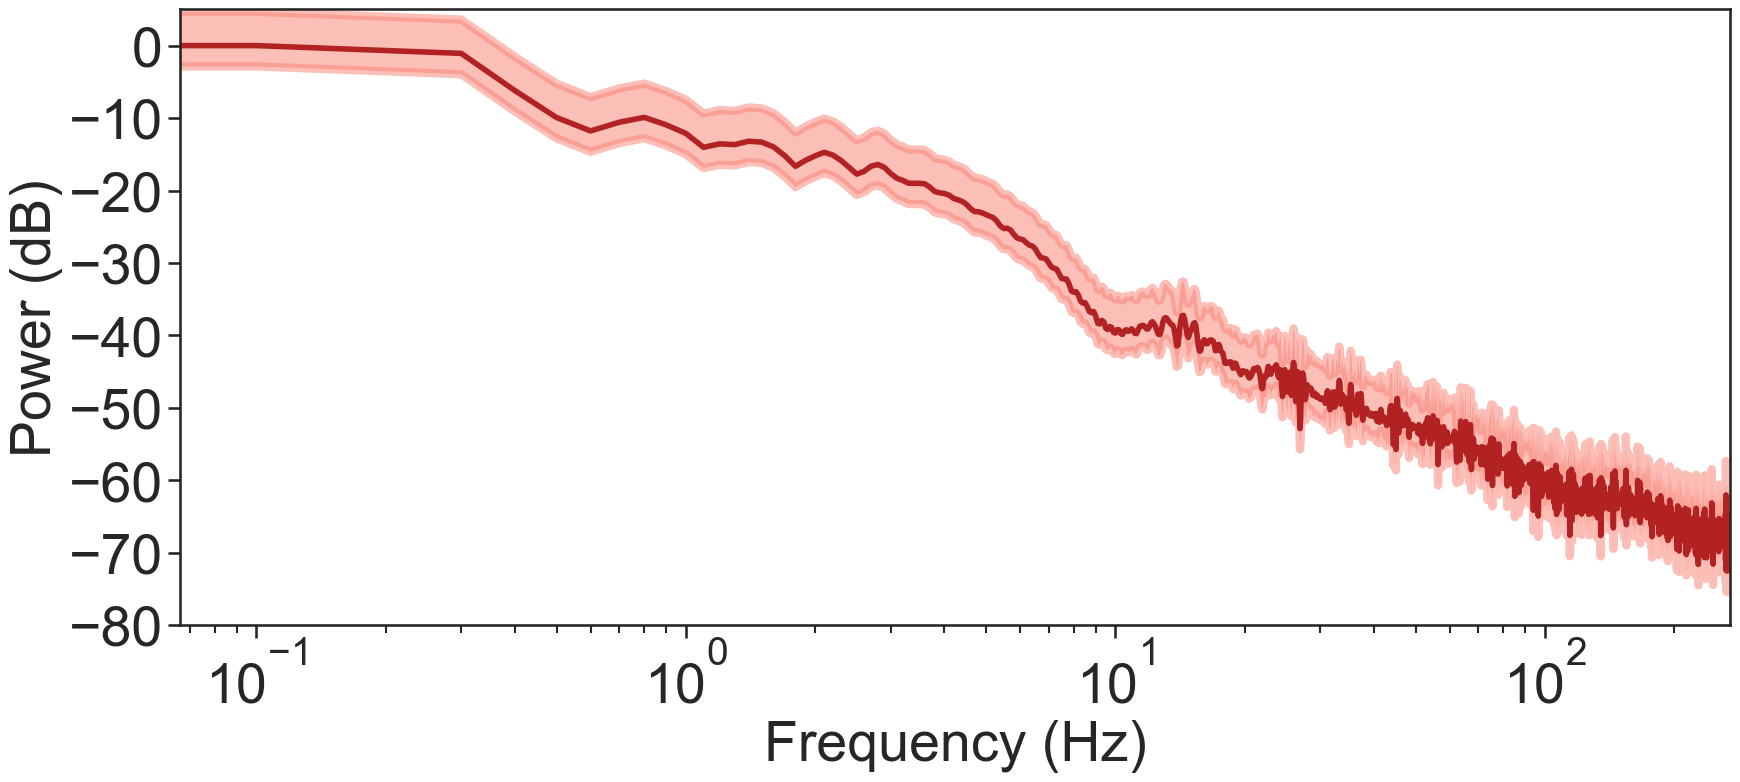

In [40]:
fig1

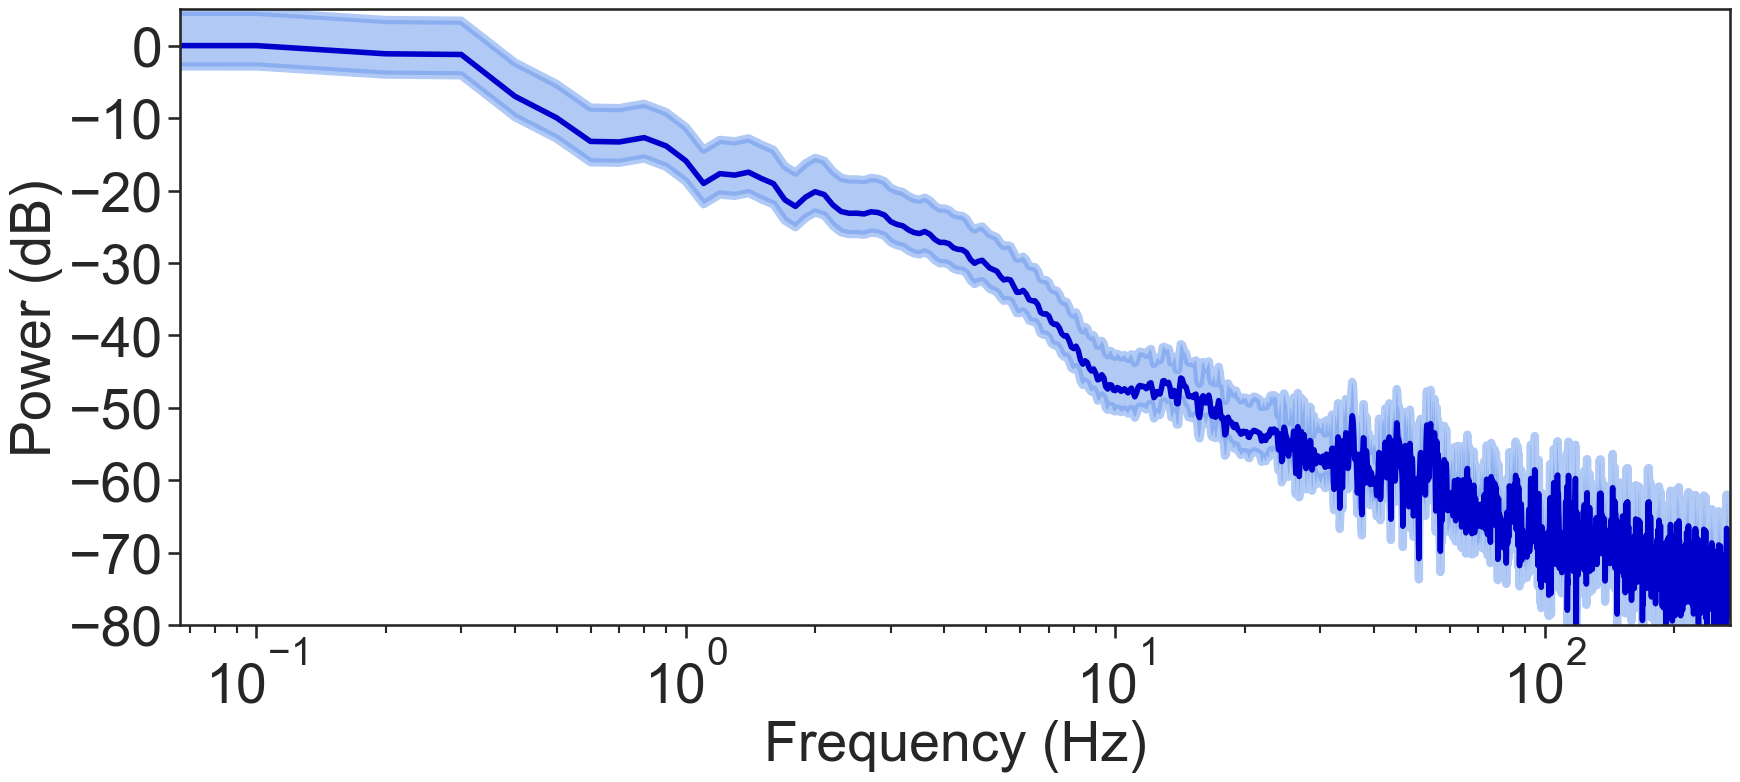

In [41]:
fig2

## Compute spectrum of all neurons in the network

### Colorbar units of this Figure are in dB

In [42]:
voltage = NetworkData.get_voltage()
foldername="fD"+str(Dnumber)+"_fF"+str(Fnumber)
data = np.load(foldername+"/VoltageData.npz")
voltage = data['voltage']

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


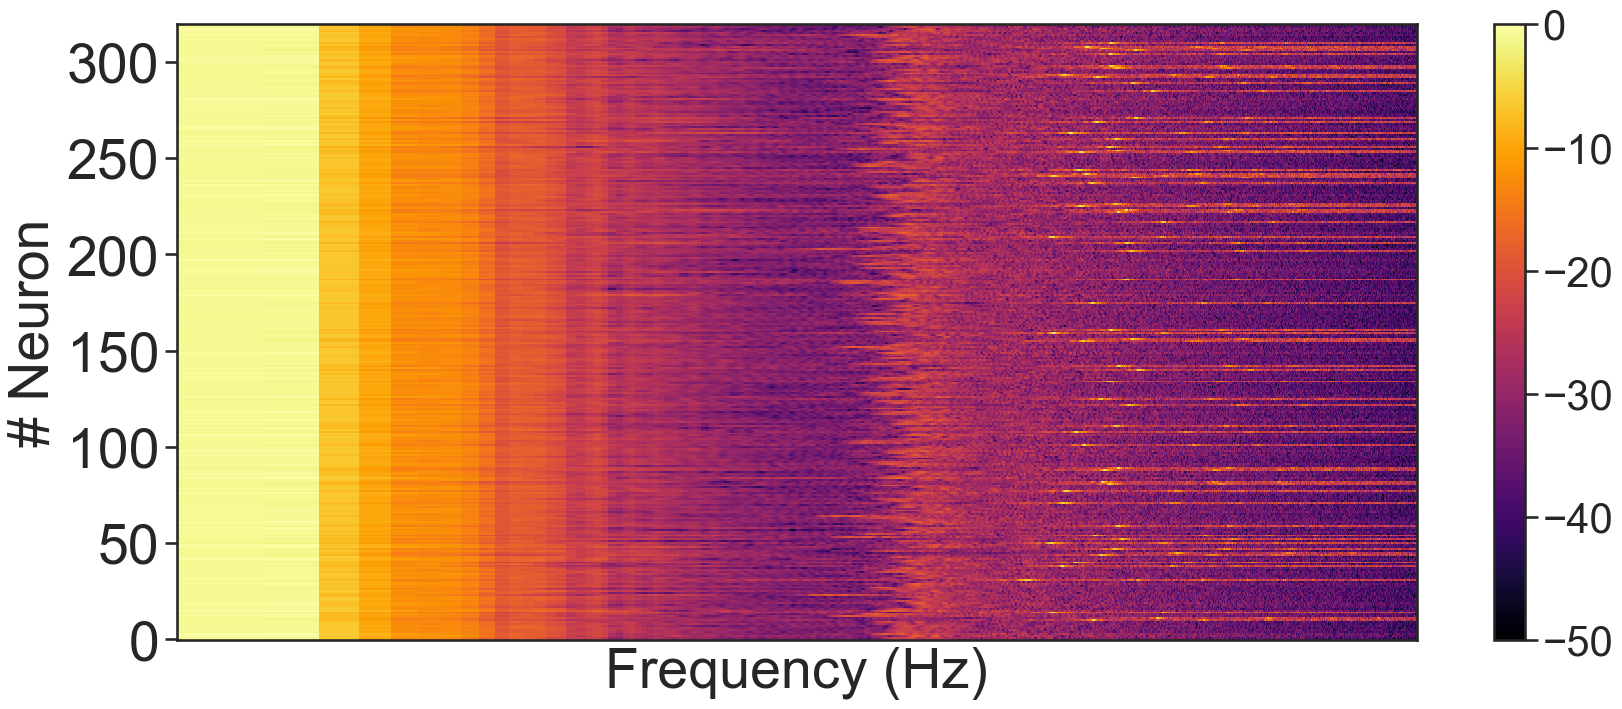

In [43]:
fig = NetworkData.SpectrogramAllNeurons()

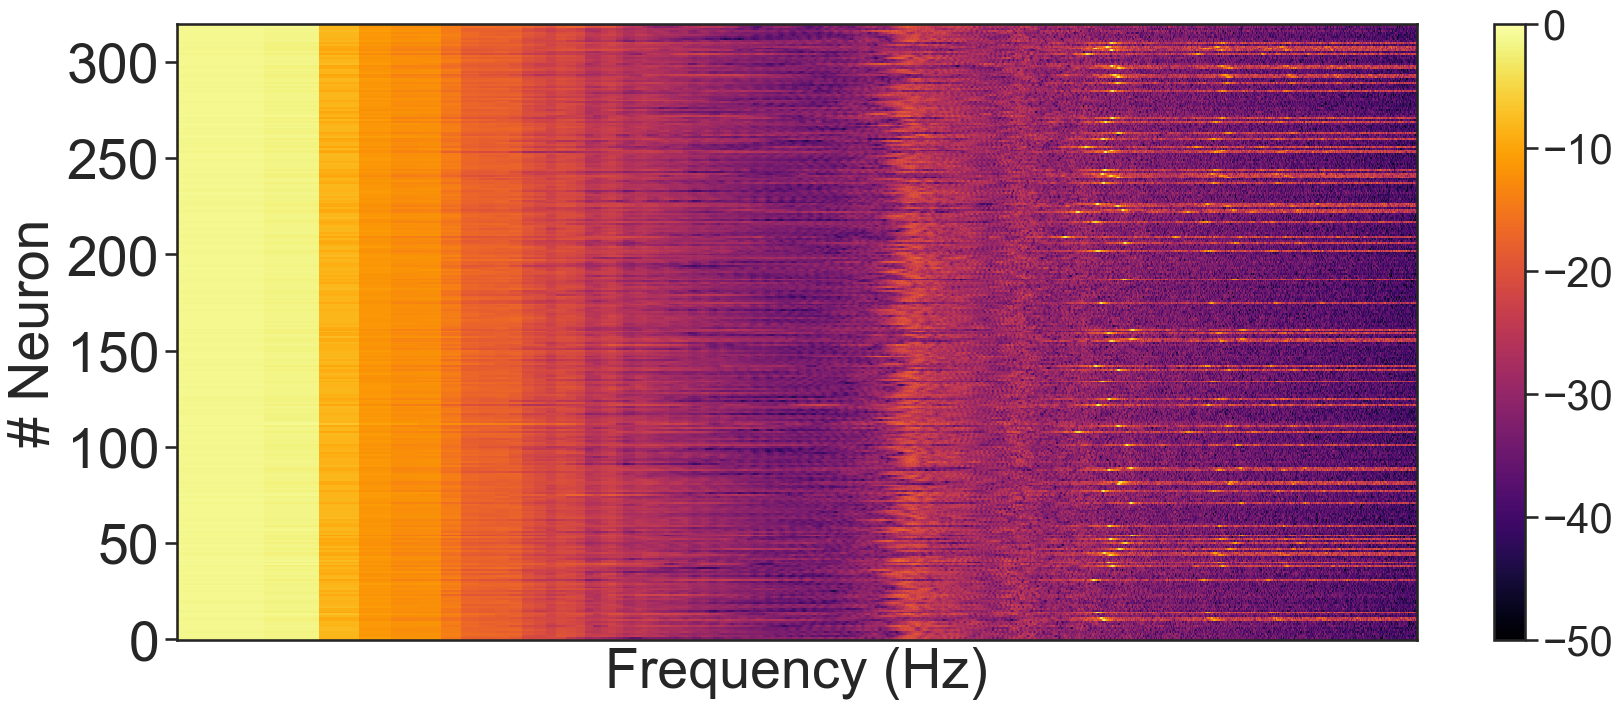

In [64]:
fig

## This code requires a lot of memory to execute

### Please restart the kernel completely and run only the following cells

In [3]:
import time
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import seaborn as sns
from scipy import signal
from matplotlib import colormaps
import matplotlib.colors as mcolors
from Tools import IFRnetwork,plot_IFRnetwork

In [7]:
tol=0.05
Dnumber = 0.84
Fnumber = 1
color_dict = mcolors.CSS4_COLORS
ExcColor = color_dict["salmon"]
InhColor = color_dict["cornflowerblue"]
nNeurons=320
file="fD"+str(Dnumber)+"_fF"+str(Fnumber)+"/NetworkIFR.npz"
foldername="fD"+str(Dnumber)+"_fF"+str(Fnumber)

In [8]:
data = np.load("Shorttime.npz")
time=data["ti"]

### Colorbar units in this Figure are in spikes/second

In [9]:
fig = plot_IFRnetwork(file,time,ExcColor,InhColor,nNeurons,foldername,tol)

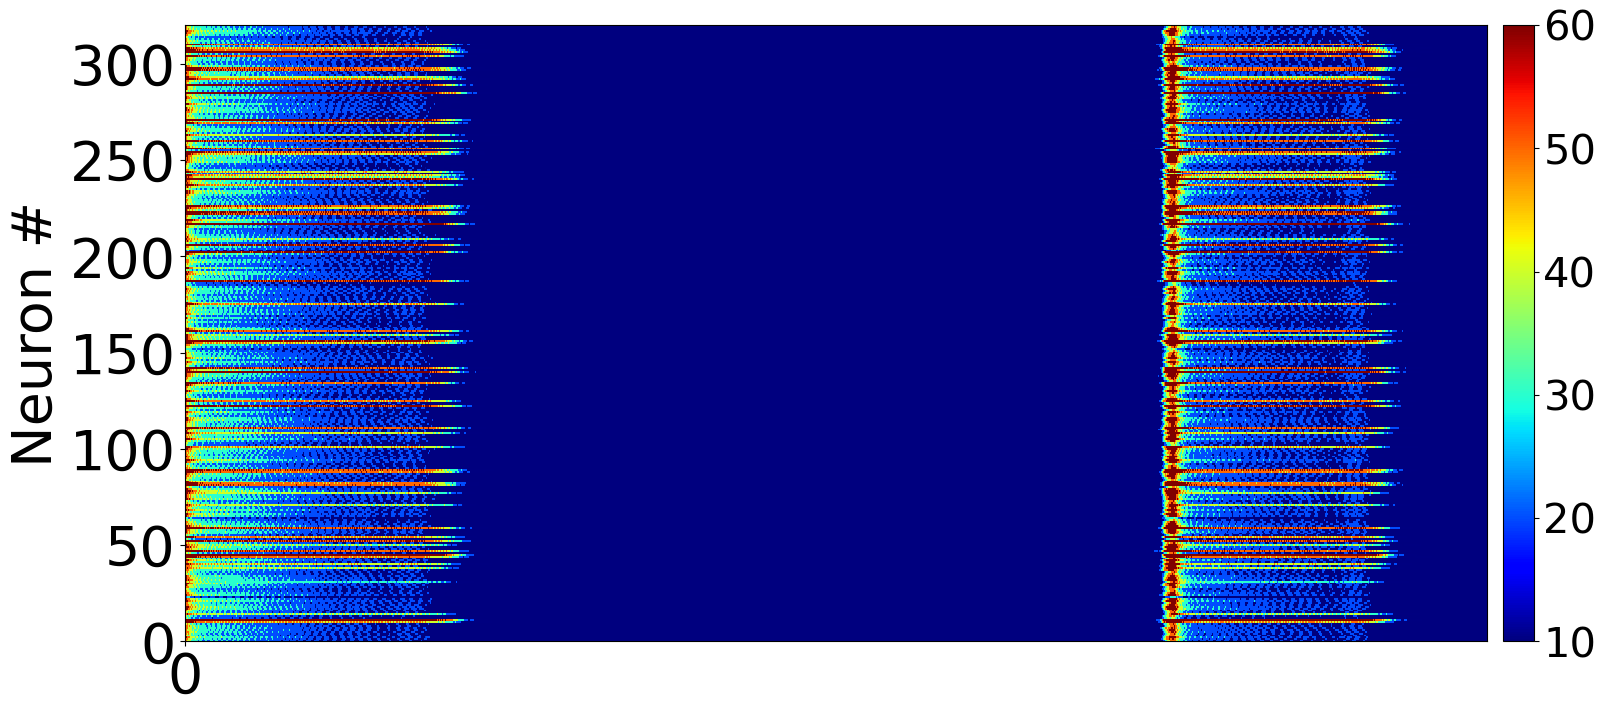

In [10]:
fig